In [1]:
import csv
import json
import networkx as nx
edges = {}

with open('graph.csv', newline='') as graph_csv_file:
    reader = csv.DictReader(graph_csv_file)
    for row in reader:
        edges[row['node']] = json.loads(row['edges_within_category'])['key']
        edges[row['node']].extend(json.loads(row['edges_outside_category'])['key'])

In [2]:
G = nx.DiGraph()

In [3]:
for source_article, target_articles in edges.items():
    for target_article in target_articles:
        G.add_edge(source_article, target_article)

In [4]:
katz_centrality = nx.katz_centrality_numpy(G)

In [5]:
centrality_values = list(katz_centrality.values())

In [6]:
import numpy as np
mean_centrality = np.mean(centrality_values)
median_centrality = np.median(centrality_values)
max_centrality = np.max(centrality_values)
min_centrality = np.min(centrality_values)
std_centrality = np.std(centrality_values)


print(f"Mean Centrality: {mean_centrality}")
print(f"Median Centrality: {median_centrality}")
print(f"Max Centrality: {max_centrality}")
print(f"Min Centrality: {min_centrality}")
print(f"Standard Deviation of Centrality: {std_centrality}")

Mean Centrality: 7.993056239936387e-05
Median Centrality: -8.628814641213625e-05
Max Centrality: 0.07836152857588681
Min Centrality: -0.07102535589550593
Standard Deviation of Centrality: 0.00904729059066017


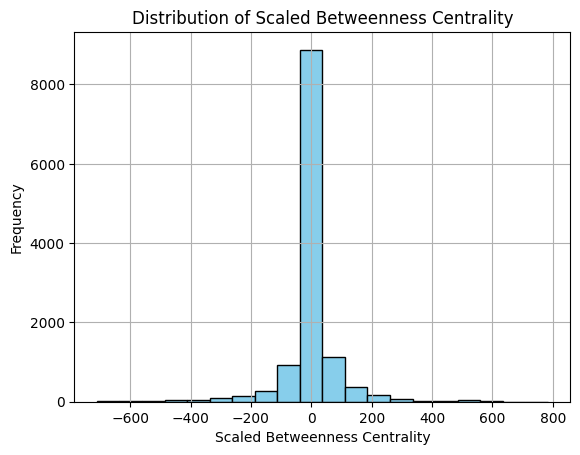

In [8]:
import matplotlib.pyplot as plt
scaling_factor = 10000  # You can adjust this scaling factor as needed
scaled_betweenness = {article: centrality * scaling_factor for article, centrality in katz_centrality.items()}

# Plot the distribution of scaled betweenness centrality
plt.hist(scaled_betweenness.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Scaled Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Betweenness Centrality')
plt.grid(True)
plt.show()

In [9]:
sorted_centrality = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)
top_50_pairs = sorted_centrality[:50]
for i, (article, centrality) in enumerate(top_50_pairs, 1):
    print(f"{i}. Article: {article}, Betweenness Centrality: {centrality}")

1. Article: Juan Domingo de Monteverde, Betweenness Centrality: 0.07836152857588681
2. Article: Simón Bolívar, Betweenness Centrality: 0.07764183217102907
3. Article: Antonio José de Sucre, Betweenness Centrality: 0.07747146621793947
4. Article: Republic of New Granada, Betweenness Centrality: 0.07426846631863052
5. Article: Argentina, Betweenness Centrality: 0.07419236819787754
6. Article: Paraguay, Betweenness Centrality: 0.0703558896676108
7. Article: Gran Colombia, Betweenness Centrality: 0.07002210210084897
8. Article: San Juan Province, Argentina, Betweenness Centrality: 0.06572855981481315
9. Article: Battle of Boyacá, Betweenness Centrality: 0.0653473030266842
10. Article: Salta Province, Betweenness Centrality: 0.06363908344138401
11. Article: Santiago del Estero Province, Betweenness Centrality: 0.0623959202175339
12. Article: Jujuy Province, Betweenness Centrality: 0.06230543100896822
13. Article: Juan Manuel Cajigal, Betweenness Centrality: 0.06227516579542371
14. Article: 